Code Reuse Session 2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Code Reuse Session 2

In [27]:
mortality_data = pd.read_csv('mortality_status.csv')

Code Reuse Session 2

In [28]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 150)

Code Reuse Session 2

In [29]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4003 non-null   int64  
 1   Sex                     4003 non-null   int64  
 2   T_Stage                 4003 non-null   int64  
 3   N_Stage                 4003 non-null   int64  
 4   6th_Stage               4003 non-null   int64  
 5   Differentiated          4003 non-null   int64  
 6   Grade                   4003 non-null   int64  
 7   A_Stage                 4003 non-null   int64  
 8   Tumor_Size              4003 non-null   int64  
 9   Estrogen_Status         4003 non-null   int64  
 10  Progesterone_Status     4003 non-null   int64  
 11  Regional_Node_Examined  4003 non-null   float64
 12  Reginol_Node_Positive   4003 non-null   int64  
 13  Survival_Months         4003 non-null   int64  
 14  Mortality_Status        4003 non-null   

Code Reuse Session 2

In [30]:
mortality_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60,1
1,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62,1
2,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75,1
3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84,1
4,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50,1


Code Reuse Session 2

In [31]:
feature_cols = [column for column in mortality_data.columns if column != 'Mortality_Status']
X = mortality_data[feature_cols]
y = mortality_data['Mortality_Status']

In [32]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = scaler.fit_transform(X)

Code Reuse Session 2

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV , StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Week 3 Seminar Session

In [34]:
print('whole data set ',mortality_data.shape)
print('x_train shape',X_train.shape)
print('X_test shape',X_test.shape)


whole data set  (4003, 15)
x_train shape (3202, 14)
X_test shape (801, 14)


Code Reuse Session 2

In [35]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Code Reuse Session 2

In [36]:
y_pred = logreg.predict(X_test)

Code Reuse Session 2

In [37]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
2583,0,1
1416,1,1
3851,1,1
3169,0,0
2339,1,1
...,...,...
3375,1,1
740,1,1
2356,1,1
2330,1,1


Code Reuse Session 2

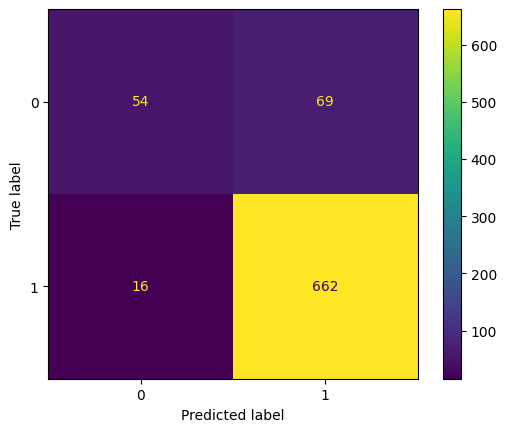

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
desp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
desp.plot()

Code Reuse Session 2

In [39]:
y_pred_train = logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.8960024984384759


Code Reuse Session 2

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8938826466916354


In [41]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       123
           1       0.91      0.98      0.94       678

    accuracy                           0.89       801
   macro avg       0.84      0.71      0.75       801
weighted avg       0.89      0.89      0.88       801



Code Reuse Session 2

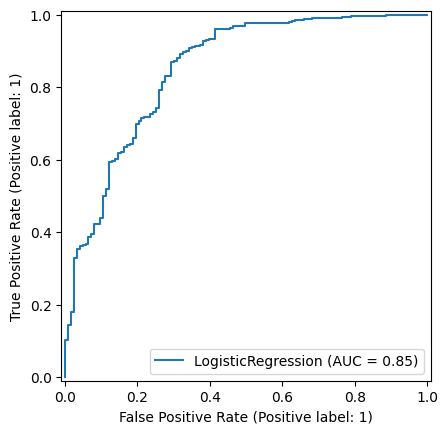

In [42]:
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

Code Reuse Session 2

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test,y_pred))

KNeighborsClassifier()

Code Reuse Session 2

In [52]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.8951310861423221


In [53]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'n_neighbors': np.arange(1,30), 'metric': ['euclidean', 'manhattan']}
knn_gscv = GridSearchCV(knn, param_grid, cv = 5,scoring='roc_auc')
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

In [44]:
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 10}

In [45]:
y_pred = knn_gscv.predict(X_test)

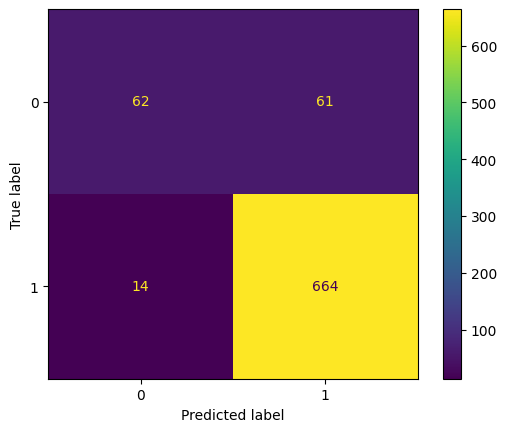

In [46]:
cm_knn = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=np.unique(y_test))
disp_knn_cm.plot()

In [47]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.50      0.62       123
           1       0.92      0.98      0.95       678

    accuracy                           0.91       801
   macro avg       0.87      0.74      0.78       801
weighted avg       0.90      0.91      0.90       801



In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.8089887640449438


In [49]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# Use ravel() to flatten y_train
gscv = GridSearchCV(
    LogisticRegression(solver='lbfgs'),
    param_grid,
    cv=skf,
    scoring='f1_weighted',  # better metric for imbalanced classes
    n_jobs=-1
)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
gscv.fit(X_scaled, y)

print("Best Parameters:", gscv.best_params_)
print("Best Score:", gscv.best_score_)

Best Parameters: {'C': 1}
Best Score: 0.8806459077242845
